In [1]:
import pandas as pd

In [30]:
def replace_t (val):
    if val =='doctor':
        val = 'Doctor'   # classify under doctor
    elif val =='advice':  # Treated like num or human
        val = "Advice"   # classify under doctor
    elif val == "nurse":
        val = 'Nurse'
    elif val == "clinic":
        val = "Clinic"
    elif val == "protocol":
        val = "Protocol"
    elif val=="cost":
        val = "Cost"
    elif val == "What went Wrong":
        val = "Problems"
    else:
        val=val
       
    return val

In [41]:
# fertility iq data
reviews = pd.read_csv('reviews.csv')
# summary
summary = pd.read_csv('../streamlitapp/summaries.csv')

In [6]:
reviews.Question.unique()

array(['experience with doctor', 'advice give prospective patient',
       'experience with nurse', 'experience with clinic',
       'protocols and success', 'cost', 'specific things went wrong'],
      dtype=object)

In [42]:
summary

,Unnamed: 0,Clinic_name,Topics,Reviews,Avg_clinic_score,Avg_doc_score,summary
0,0,Columbia University,doctor,Dr. Rudick is very professional and knowledgea...,8.3,8.4,Dr. Rudick is very professional and knowledgea...
1,1,Columbia University,advice,"I would tell her that she is in good hands, to...",8.3,8.4,"I would tell her that she is in good hands, to..."
2,2,Columbia University,nurse,Jenn is wonderful to work with. She was so qui...,8.3,8.4,She was so quick via phone and email and was c...
3,3,Columbia University,clinic,The second IUI I had was done with two male do...,8.3,8.4,The second IUI I had was done with two male do...
4,4,Columbia University,protocol,I do not have a uterus but still have my ovari...,8.3,8.4,I do not have a uterus but still have my ovari...
...,...,...,...,...,...,...,...
79,79,University of Pennsylvania Penn Fertility Care,nurse,Nurse Nia was very compassionate and respectab...,7.9,8.3,Nurse Nia was very compassionate and respectab...
80,80,University of Pennsylvania Penn Fertility Care,clinic,The Penn fertility nursing staff is highly var...,7.9,8.3,The Penn fertility nursing staff is highly var...
81,81,University of Pennsylvania Penn Fertility Care,protocol,I did a few IUIs with her-- either 2 or 3. I ...,7.9,8.3,I did a few IUIs with her-- either 2 or 3. Aft...
82,82,University of Pennsylvania Penn Fertility Care,cost,I don't recall. We did have insurance to cove...,7.9,8.3,We did have insurance to cover some of the pro...


In [64]:
def replace_q (df):
    topic_list = []
    #for t in df.Question:       # Fertility IQ
    for t in df.topics_predicted: # Yelp
    
        if t =='experience with doctor':
            topic_list.append('Doctor')
        
        elif t =='advice give prospective patient':  # Treated like num or human
            topic_list.append("Advice")   # classify under doctor
    
        elif t == "experience with nurse":
            topic_list.append('Nurse')
    
        elif t == "experience with clinic":
            topic_list.append("Clinic")
    
        elif t == "protocols and success":
            topic_list.append("Protocols")
    
        elif t=="cost":
            topic_list.append("Cost")
    
        else:
            topic_list.append("Problems")

    df['Topics']= topic_list
    return df

In [13]:
replace_q(reviews)

,Unnamed: 0,clinic_name,avg_clinic_score,avg_doc_score,success,income,Question,Answer,Topics
0,0,Columbia University,8.3,8.4,Yes,$100K - $199K,experience with doctor,Dr. Rudick is very professional and knowledgea...,Doctor
1,1,Columbia University,8.3,8.4,?,$200K - $499K,experience with doctor,Dr. Forman listened to my concerns and is very...,Doctor
2,2,Columbia University,8.3,8.4,Yes,$0 - $49K,experience with doctor,There aren't enough words to describe how amaz...,Doctor
3,3,Columbia University,8.3,8.4,Yes,$100K - $199K,experience with doctor,The level of contact and patience he had for m...,Doctor
4,4,Columbia University,8.3,8.4,Yes,$100K - $199K,experience with doctor,"As a physician myself, I was impressed with bo...",Doctor
...,...,...,...,...,...,...,...,...,...
14825,14825,RMA of New Jersey,9.1,9.1,Yes,$50K - $99K,specific things went wrong,Lost appointments,Problems
14826,14826,RMA of New Jersey,9.1,9.1,Yes,$50K - $99K,specific things went wrong,"Failed to order appropriate test, Failed to se...",Problems
14827,14827,RMA of New Jersey,9.1,9.1,No,$100K - $199K,specific things went wrong,Provided conflicting information,Problems
14828,14828,RMA of Philadelphia,8.5,8.5,No,$100K - $199K,specific things went wrong,Provided conflicting information,Problems


In [15]:
reviews.to_csv('reviews.csv')

In [43]:
summary.Topics = summary.Topics.apply(replace_t)

In [44]:
summary.Topics.unique()

array(['Doctor', 'Advice', 'Nurse', 'Clinic', 'Protocol', 'Cost',
       'Problems'], dtype=object)

In [49]:
summary.to_csv('../streamlitapp/fiq_summary.csv')

In [45]:
summary

,Unnamed: 0,Clinic_name,Topics,Reviews,Avg_clinic_score,Avg_doc_score,summary
0,0,Columbia University,Doctor,Dr. Rudick is very professional and knowledgea...,8.3,8.4,Dr. Rudick is very professional and knowledgea...
1,1,Columbia University,Advice,"I would tell her that she is in good hands, to...",8.3,8.4,"I would tell her that she is in good hands, to..."
2,2,Columbia University,Nurse,Jenn is wonderful to work with. She was so qui...,8.3,8.4,She was so quick via phone and email and was c...
3,3,Columbia University,Clinic,The second IUI I had was done with two male do...,8.3,8.4,The second IUI I had was done with two male do...
4,4,Columbia University,Protocol,I do not have a uterus but still have my ovari...,8.3,8.4,I do not have a uterus but still have my ovari...
...,...,...,...,...,...,...,...
79,79,University of Pennsylvania Penn Fertility Care,Nurse,Nurse Nia was very compassionate and respectab...,7.9,8.3,Nurse Nia was very compassionate and respectab...
80,80,University of Pennsylvania Penn Fertility Care,Clinic,The Penn fertility nursing staff is highly var...,7.9,8.3,The Penn fertility nursing staff is highly var...
81,81,University of Pennsylvania Penn Fertility Care,Protocol,I did a few IUIs with her-- either 2 or 3. I ...,7.9,8.3,I did a few IUIs with her-- either 2 or 3. Aft...
82,82,University of Pennsylvania Penn Fertility Care,Cost,I don't recall. We did have insurance to cove...,7.9,8.3,We did have insurance to cover some of the pro...


# Yelp

In [81]:
yelp_r = pd.read_csv('../streamlitapp/yelp_reviews.csv')
yelp_m = pd.read_csv('../streamlitapp/yelp_model_results.csv')
yelp_s = pd.read_csv('../streamlitapp/yelp_summary.csv')

In [82]:
yelp_r.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Clinic_name', 'Ratings', 'Reviews',
       'Num_Rating'],
      dtype='object')

In [83]:
yelp_m.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Reviews_by_sentence',
       'Clinic', 'clean_answers', 'topics_predicted', 'Topics'],
      dtype='object')

In [84]:
yelp_s.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Clinic_name', 'Topics', 'Reviews',
       'summary'],
      dtype='object')

In [55]:
yelp_r.Clinic_name.unique()

array(['Columbia University Fertility', 'New Hope Fertility Center',
       'NYU Langone Fertility Center', 'RMA of New York',
       'Weill Cornell Medicine - Center for Reproductive Medicine',
       'CCRM Fertility New York',
       'Sher Institute For Reproductive Medicine', 'Extend Fertility',
       'Reproductive Medicine Associates of New Jersey RMANJ',
       'RMA of Philadelphia', 'Main Line Fertility',
       'Penn Fertility Care'], dtype=object)

In [59]:
yelp_m.topics_predicted.unique()

array(['experience with clinic', 'experience with doctor',
       'experience with nurse', 'advice give prospective patient',
       'protocols and success', 'cost'], dtype=object)

In [60]:
yelp_s.Topics.unique()

array(['doctor', 'advice', 'nurse', 'clinic', 'protocol', 'cost',
       'What went Wrong'], dtype=object)

In [65]:
yelp_m = replace_q(yelp_m)

In [66]:
yelp_m.to_csv('../streamlitapp/yelp_model_results.csv')

In [70]:
yelp_s.Topics = yelp_s.Topics.apply(replace_t)

In [72]:
yelp_s.to_csv('../streamlitapp/yelp_summary.csv')

In [74]:
import seaborn as sns

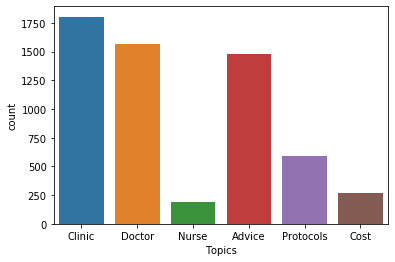

In [75]:
sns.countplot(yelp_m.Topics)

In [77]:
def rate(df):
    rate_list = []
    for i in df.Ratings:
        rate_list.append(int(i[0]))
    
    df['Num_Rating'] = rate_list
    return df

In [78]:
yelp_r = rate(yelp_r) 

In [80]:
yelp_r.to_csv('../streamlitapp/yelp_reviews.csv')

In [85]:
yelp_s

,Unnamed: 0,Unnamed: 0.1,Clinic_name,Topics,Reviews,summary
0,0,0,Columbia University Fertility,Doctor,We were seen by Dr Paula Brady at the Columbi...,Over the course of two years there were many w...
1,1,1,Columbia University Fertility,Advice,She would even reply emails on Sundays She co...,She answered all my questions and concerns No ...
2,2,2,Columbia University Fertility,Nurse,"I would often bother her with issues, which m...","I would often bother her with issues, which m..."
3,3,3,Columbia University Fertility,Clinic,Columbia University Fertility center is an exc...,doctors and staff over a couple of years . The...
4,4,4,Columbia University Fertility,Protocol,"Overall, the process was lengthy, but we were...","Overall, the process was lengthy, but we were..."
...,...,...,...,...,...,...
79,79,79,Penn Fertility Care,Nurse,Incredibly frustrating She was knowledgeable ...,Incredibly frustrating She was knowledgeable ...
80,80,80,Penn Fertility Care,Clinic,"Individually, many of the nurses, doctors, re...",That was our last visit We chose a different f...
81,81,81,Penn Fertility Care,Protocol,"If you are gay, or single, you will most defi...",I mean if I knew it from the beginning I would...
82,82,82,Penn Fertility Care,Cost,I've bumped up my star rating to 3/5 as a res...,They wouldn't tell us the price of any fertili...


In [86]:
cdc = pd.read_csv('../streamlitapp/df_concat.csv')

In [90]:
cdc_short = cdc[(cdc['ClinStateCode']=="NEW YORK")|(cdc['ClinStateCode']=="NEW JERSEY")|(cdc['ClinStateCode']=="PENNSYLVANIA")]

In [103]:
cdc_short.columns

Index(['Unnamed: 0', 'PrevClinName1', 'ClinCityCode', 'ClinStateCode', 'Year',
       'ICSI_Rate', 'PGD_Rate', 'ND_TransLB1', 'ND_TransLB2', 'ND_TransLB3',
       'ND_TransLB4', 'TotNumCyclesAll', 'TransFrozEmbAll', 'ClinicNames'],
      dtype='object')

In [100]:
len(yelp_m.Clinic.unique())

12

In [94]:
cdc_short = cdc_short.reset_index(drop=True)

In [104]:
name_list = ['COLUMBIA','NYU','CORNELL','NEW HOPE','CCRM','SHER INSTITUTE',
            'EXTEND','REPRODUCTIVE MEDICINE ASSOCIATES OF NEW YORK',
             'REPRODUCTIVE MEDICINE ASSOCIATES OF NEW JERSEY',
             'REPRODUCTIVE MEDICINE ASSOCIATES OF PHILADELPHIA','MAIN LINE',
            'UNIVERSITY OF PENNSYLVANIA']
index_list = []
name_list = []
df = pd.DataFrame(columns=['Unnamed: 0', 'PrevClinName1', 'ClinCityCode', 'ClinStateCode', 'Year',
       'ICSI_Rate', 'PGD_Rate', 'ND_TransLB1', 'ND_TransLB2', 'ND_TransLB3',
       'ND_TransLB4', 'TotNumCyclesAll', 'TransFrozEmbAll', 'ClinicNames'])
for i, name in enumerate(cdc_short.PrevClinName1):
    for x in name_list:
        if x in name:
            
            index_list.append(i)
            df.loc[i] = cdc_short.loc[i]
            
            
    

In [101]:
len(index_list)

112

In [107]:
df = df.reset_index(drop=True)

In [111]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
name_list=[]
for name in df.PrevClinName1:
    if name == ""

In [138]:
df.to_csv("../streamlitapp/cdc_data.csv")

In [114]:
from fuzzywuzzy import fuzz

In [132]:
def harmonize_clinic_name(df):
    # list of name to match to
    
    names_to_compare = yelp_r.Clinic_name.unique()
    df_new_name_list = []
    
    #Now compare with names between 2000 and 2018
    
    for name in df.PrevClinName1:
        
        if name in names_to_compare:
            df_new_name_list.append(name)
            continue
            
        else:
            match = False
            for name2 in names_to_compare:
                score = fuzz.token_sort_ratio(name, name2)
                
                if score > 80:
                    #max_score = score
                    df_new_name_list.append(name2)
                    match = True
                    break
            if not match:
                df_new_name_list.append(name)
        
    return df_new_name_list

In [133]:
new_name = harmonize_clinic_name(df)

In [134]:
new_name

['Reproductive Medicine Associates of New Jersey RMANJ',
 "COLUMBIA UNIVERSITY CENTER FOR WOMEN'S REPRODUCTIVE CARE",
 'New Hope Fertility Center',
 'NYU Langone Fertility Center',
 'Reproductive Medicine Associates of New Jersey RMANJ',
 'WEILL MEDICAL COLLEGE OF CORNELL UNIVERSITY',
 'MAIN LINE FERTILITY AND REPRODUCTIVE MEDICINE',
 'UNIVERSITY OF PENNSYLVANIA',
 'Sher Institute For Reproductive Medicine',
 'Reproductive Medicine Associates of New Jersey RMANJ',
 "COLUMBIA UNIVERSITY CENTER FOR WOMEN'S REPRODUCTIVE CARE",
 'New Hope Fertility Center',
 'NYU Langone Fertility Center',
 'Reproductive Medicine Associates of New Jersey RMANJ',
 'WEILL MEDICAL COLLEGE OF CORNELL UNIVERSITY',
 'MAIN LINE FERTILITY AND REPRODUCTIVE MEDICINE',
 'REPRODUCTIVE MEDICINE ASSOCIATES OF PHILADELPHIA',
 'UNIVERSITY OF PENNSYLVANIA',
 'Sher Institute For Reproductive Medicine',
 'Reproductive Medicine Associates of New Jersey RMANJ',
 "COLUMBIA UNIVERSITY CENTER FOR WOMEN'S REPRODUCTIVE CARE",
 'New

In [147]:
df = pd.read_csv('../streamlitapp/cdc_data.csv')
df.PrevClinName1.value_counts()

NYU FERTILITY CENTER                                 12
REPRODUCTIVE MEDICINE ASSOCIATES OF NEW JERSEY       11
NEW HOPE FERTILITY CENTER                            11
WEILL MEDICAL COLLEGE OF CORNELL UNIVERSITY          11
REPRODUCTIVE MEDICINE ASSOCIATES OF NEW YORK, LLP    11
UNIVERSITY OF PENNSYLVANIA                           11
MAIN LINE FERTILITY AND REPRODUCTIVE MEDICINE        11
COLUMBIA UNIVERSITY FERTILITY CENTER                 11
REPRODUCTIVE MEDICINE ASSOCIATES OF PHILADELPHIA     10
SHER INSTITUTE FOR REPRODUCTIVE MEDICINE              9
EXTEND FERTILITY-EXPECT FERTILITY                     2
CCRM NEW YORK                                         2
Name: PrevClinName1, dtype: int64

In [125]:
for name in df.PrevClinName1:
    print (name)

REPRODUCTIVE MEDICINE ASSOCIATES OF NEW JERSEY
COLUMBIA UNIVERSITY CENTER FOR WOMEN'S REPRODUCTIVE CARE
NEW HOPE FERTILITY CENTER
NYU FERTILITY CENTER
REPRODUCTIVE MEDICINE ASSOCIATES OF NEW YORK, LLP
WEILL MEDICAL COLLEGE OF CORNELL UNIVERSITY
MAIN LINE FERTILITY AND REPRODUCTIVE MEDICINE
UNIVERSITY OF PENNSYLVANIA
SHER INSTITUTE FOR REPRODUCTIVE MEDICINE-NEW JERSEY
REPRODUCTIVE MEDICINE ASSOCIATES OF NEW JERSEY
COLUMBIA UNIVERSITY CENTER FOR WOMEN'S REPRODUCTIVE CARE
NEW HOPE FERTILITY CENTER
NYU FERTILITY CENTER
REPRODUCTIVE MEDICINE ASSOCIATES OF NEW YORK, LLP
WEILL MEDICAL COLLEGE OF CORNELL UNIVERSITY
MAIN LINE FERTILITY AND REPRODUCTIVE MEDICINE
REPRODUCTIVE MEDICINE ASSOCIATES OF PHILADELPHIA
UNIVERSITY OF PENNSYLVANIA
SHER INSTITUTE FOR REPRODUCTIVE MEDICINE-NEW JERSEY
REPRODUCTIVE MEDICINE ASSOCIATES OF NEW JERSEY
COLUMBIA UNIVERSITY CENTER FOR WOMEN'S REPRODUCTIVE CARE
NEW HOPE FERTILITY CENTER
NYU FERTILITY CENTER
REPRODUCTIVE MEDICINE ASSOCIATES OF NEW YORK, LLP
WEILL MEDI

In [143]:
df

,Unnamed: 0,PrevClinName1,ClinCityCode,ClinStateCode,Year,ICSI_Rate,PGD_Rate,ND_TransLB1,ND_TransLB2,ND_TransLB3,ND_TransLB4,TotNumCyclesAll,TransFrozEmbAll,ClinicNames
0,0,REPRODUCTIVE MEDICINE ASSOCIATES OF NEW JERSEY,MORRISTOWN,NEW JERSEY,2008,75.0,4.0,48.85,41.25,33.90,18.900000,2085,16.930456,REPRODUCTIVE MEDICINE ASSOCIATES OF NEW JERSEY...
1,1,COLUMBIA UNIVERSITY FERTILITY CENTER,NEW YORK,NEW YORK,2008,58.0,1.0,38.80,33.30,26.55,15.033333,1372,9.548105,COLUMBIA UNIVERSITY CENTER FOR WOMEN'S REPRODU...
2,2,NEW HOPE FERTILITY CENTER,NEW YORK,NEW YORK,2008,68.0,1.0,23.50,20.05,14.30,10.400000,1003,41.575274,THE NEW YORK FERTILITY CENTER FLUSHING
3,3,NYU FERTILITY CENTER,NEW YORK,NEW YORK,2008,29.0,8.0,39.10,31.85,25.95,17.392308,1236,14.158576,THE NEW YORK FERTILITY CENTER FLUSHING
4,4,"REPRODUCTIVE MEDICINE ASSOCIATES OF NEW YORK, LLP",NEW YORK,NEW YORK,2008,54.0,5.0,36.15,34.30,24.30,14.733333,1652,11.864407,"REPRODUCTIVE MEDICINE ASSOCIATES OF NEW YORK, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,SHER INSTITUTE FOR REPRODUCTIVE MEDICINE,NEW YORK,NEW YORK,2018,87.9,33.5,47.50,42.50,28.40,22.000000,1181,78.300000,SHER INSTITUTE FOR REPRODUCTIVE MEDICINE-NEW Y...
108,108,WEILL MEDICAL COLLEGE OF CORNELL UNIVERSITY,NEW YORK,NEW YORK,2018,88.5,21.2,48.50,38.70,36.50,20.700000,5808,49.500000,WEILL CORNELL MEDICINE NEW YORK
109,109,MAIN LINE FERTILITY AND REPRODUCTIVE MEDICINE,BRYN MAWR,PENNSYLVANIA,2018,41.6,38.6,39.90,39.30,32.60,19.000000,1297,67.000000,MAIN LINE FERTILITY AND REPRODUCTIVE MEDICINE ...
110,110,REPRODUCTIVE MEDICINE ASSOCIATES OF PHILADELPHIA,KING OF PRUSSIA,PENNSYLVANIA,2018,70.6,44.0,45.90,41.30,40.30,0.000000,1521,89.200000,REPRODUCTIVE MEDICINE ASSOCIATES OF PHILADELPH...


In [144]:
yelp_m.Clinic.unique()

array(['Columbia University Fertility', 'New Hope Fertility Center',
       'NYU Langone Fertility Center', 'RMA of New York',
       'Weill Cornell Medicine - Center for Reproductive Medicine',
       'CCRM Fertility New York',
       'Sher Institute For Reproductive Medicine', 'Extend Fertility',
       'Reproductive Medicine Associates of New Jersey RMANJ',
       'RMA of Philadelphia', 'Main Line Fertility',
       'Penn Fertility Care'], dtype=object)

In [152]:
import matplotlib.pyplot as plt

(10, 80)

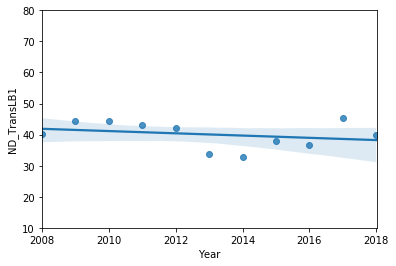

In [162]:
df_test = df[df['Yelp']=='Main Line Fertility']
y_a = "ND_TransLB1"
p = sns.regplot(data=df_test, x="Year",y=y_a)
p.set_ylim(10,80)